In [119]:
import pandas as pd
import numpy as np
import collections
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./dat', encoding='utf-8', sep=',') # data read

In [4]:
# EDA

In [5]:
print(df.shape) # size of data

(52500, 74)


In [6]:
print(df.iloc[:, 0:10].head(10))
print("="*50)
print(df.iloc[:, 10:20].head(10))
print("="*50)
print(df.iloc[:, 20:30].head(10))
print("="*50)
print(df.iloc[:, 30:40].head(10))
print("="*50)
print(df.iloc[:, 40:50].head(10))
print("="*50)
print(df.iloc[:, 50:60].head(10))
print("="*50)
print(df.iloc[:, 60:70].head(10))
print("="*50)
print(df.iloc[:, 70:75].head(10))

   y  x0_age  x1_term  x2_sex  x3  x4  x5  x6  x7  x8
0  1    22.0        0       2  10   1   0  99  99  99
1  1    49.0       36       2  10   1   8   1  99  99
2  1    22.0       13       1  10   1   6   1  99  99
3  1    34.0       24       1  10   2   0  99  99  99
4  1    26.0       97       1  32   1  10   1  99  99
5  1    51.0      143       1  10   1   9   1  99  99
6  0    22.0       39       2  33   2   0  99  99  99
7  0    40.0      157       2  10   1   0  99   1  99
8  0    47.0      218       1  10   1   0  99  99  99
9  0    41.0       13       2  10   2   0  99  99  99
  x9   x10  x11  x12  x13  x14  x15  x16  x17  x18
0  T  22.0   99   99   99    2    2    2    1    2
1  K  46.0    4    4    4    2    2    1    2    2
2  T  21.0   99    2    5    2    2    2    2    2
3  K  32.0   99    2    5    2    2    2    2    2
4  Q  18.0   99    4    4    2    2    1    1    2
5  K  31.0   99    2    5    2    2    2    2    2
6  T  19.0   99    4    4    2    2    1    1    

In [7]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
categorical_feats = df.dtypes[df.dtypes == "object"].index
print(numerical_feats)
print("="*50)
print(categorical_feats)

Index(['y', 'x0_age', 'x1_term', 'x2_sex', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69',
       'x70', 'x71', 'x72'],
      dtype='object')
Index(['x9'], dtype='object')


In [8]:
print('unique values of {0}：{1}'.format(df.columns[15], df.iloc[:, 15].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[19], df.iloc[:, 19].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[20], df.iloc[:, 20].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[22], df.iloc[:, 22].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[23], df.iloc[:, 23].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[24], df.iloc[:, 24].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[28], df.iloc[:, 28].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[29], df.iloc[:, 29].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[30], df.iloc[:, 30].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[31], df.iloc[:, 31].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[32], df.iloc[:, 32].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[34], df.iloc[:, 34].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[35], df.iloc[:, 35].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[36], df.iloc[:, 36].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[37], df.iloc[:, 37].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[38], df.iloc[:, 38].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[39], df.iloc[:, 39].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[41], df.iloc[:, 41].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[47], df.iloc[:, 47].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[48], df.iloc[:, 48].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[49], df.iloc[:, 49].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[50], df.iloc[:, 50].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[51], df.iloc[:, 51].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[52], df.iloc[:, 52].unique())) # single ?
print('unique values of {0}：{1}'.format(df.columns[73], df.iloc[:, 73].unique())) # single ?

unique values of x14：[2]
unique values of x18：[2]
unique values of x19：[2]
unique values of x21：[2]
unique values of x22：[2]
unique values of x23：[2]
unique values of x27：[2]
unique values of x28：[2]
unique values of x29：[2]
unique values of x30：[2]
unique values of x31：[2]
unique values of x33：[2]
unique values of x34：[2]
unique values of x35：[2]
unique values of x36：[2]
unique values of x37：[2]
unique values of x38：[2]
unique values of x40：[99]
unique values of x46：[2]
unique values of x47：[2]
unique values of x48：[2]
unique values of x49：[2]
unique values of x50：[2]
unique values of x51：[2]
unique values of x72：[0]


In [9]:
print('unique values of {0}：{1}'.format(df.columns[0], df.iloc[:, 0].unique())) # y
print('unique values of {0}：{1}'.format(df.columns[5], df.iloc[:, 5].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[16], df.iloc[:, 16].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[17], df.iloc[:, 17].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[18], df.iloc[:, 18].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[21], df.iloc[:, 21].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[25], df.iloc[:, 25].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[26], df.iloc[:, 26].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[27], df.iloc[:, 27].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[45], df.iloc[:, 45].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[53], df.iloc[:, 53].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[54], df.iloc[:, 54].unique())) # binary
print('unique values of {0}：{1}'.format(df.columns[55], df.iloc[:, 55].unique())) # binary

unique values of y：[1 0]
unique values of x4：[1 2]
unique values of x15：[2 1]
unique values of x16：[2 1]
unique values of x17：[1 2]
unique values of x20：[1 2]
unique values of x24：[2 1]
unique values of x25：[2 1]
unique values of x26：[2 1]
unique values of x44：[99  1]
unique values of x52：[2 1]
unique values of x53：[2 1]
unique values of x54：[2 1]


In [10]:
print('unique values of {0}：{1}'.format(df.columns[3], df.iloc[:, 3].unique())) # 3 values
print('unique values of {0}：{1}'.format(df.columns[9], df.iloc[:, 9].unique())) # 3 values
print('unique values of {0}：{1}'.format(df.columns[44], df.iloc[:, 44].unique())) # 3 values
print('unique values of {0}：{1}'.format(df.columns[40], df.iloc[:, 40].unique())) # 3 values
print("="*50)
print('unique values of {0}：{1}'.format(df.columns[7], df.iloc[:, 7].unique())) # 4 values
print('unique values of {0}：{1}'.format(df.columns[8], df.iloc[:, 8].unique())) # 4 values
print('unique values of {0}：{1}'.format(df.columns[33], df.iloc[:, 33].unique())) # 4 values
print('unique values of {0}：{1}'.format(df.columns[46], df.iloc[:, 46].unique())) # 4 values
print("="*50)
print('unique values of {0}：{1}'.format(df.columns[12], df.iloc[:, 12].unique())) # 5 values
print('unique values of {0}：{1}'.format(df.columns[13], df.iloc[:, 13].unique())) # 5 values
print("="*50)
print('unique values of {0}：{1}'.format(df.columns[42], df.iloc[:, 42].unique())) # 5 values
print('unique values of {0}：{1}'.format(df.columns[43], df.iloc[:, 43].unique())) # 5 values
print('unique values of {0}：{1}'.format(df.columns[58], df.iloc[:, 58].unique())) # 5 values
print("="*50)
print('unique values of {0}：{1}'.format(df.columns[14], df.iloc[:, 14].unique())) # 6 values
print('unique values of {0}：{1}'.format(df.columns[56], df.iloc[:, 56].unique())) # 6 valeus

unique values of x2_sex：[ 2  1 99]
unique values of x8：[99  1  2]
unique values of x43：[99  1  2]
unique values of x39：[ 2  1 99]
unique values of x6：[99  1  3  2]
unique values of x7：[99  1  2  3]
unique values of x32：[ 2 99  1  3]
unique values of x45：[99  3  1  2]
unique values of x11：[99  4  3  1  2]
unique values of x12：[99  4  2  1  3]
unique values of x41：[ 1 99  0 51 61]
unique values of x42：[99  1  3  2  4]
unique values of x57：[ 2  3  4 90  1]
unique values of x13：[99  4  5  1  3  2]
unique values of x55：[99  3  4  2  5  1]


In [11]:
# complex
print('unique values of {0}：{1}'.format(df.columns[1], df.iloc[:, 1].unique())) # x0_age
print('unique values of {0}：{1}'.format(df.columns[2], df.iloc[:, 2].unique())) # x1_term
print('unique values of {0}：{1}'.format(df.columns[4], df.iloc[:, 4].unique())) # x3
print('unique values of {0}：{1}'.format(df.columns[6], df.iloc[:, 6].unique())) # x5
print('unique values of {0}：{1}'.format(df.columns[11], df.iloc[:, 11].unique())) # x10
print('unique values of {0}：{1}'.format(df.columns[57], df.iloc[:, 57].unique()))
print('unique values of {0}：{1}'.format(df.columns[59], df.iloc[:, 59].unique()))
print('unique values of {0}：{1}'.format(df.columns[60], df.iloc[:, 60].unique()))
print('unique values of {0}：{1}'.format(df.columns[61], df.iloc[:, 61].unique()))
print('unique values of {0}：{1}'.format(df.columns[62], df.iloc[:, 62].unique()))
print('unique values of {0}：{1}'.format(df.columns[63], df.iloc[:, 63].unique()))
print('unique values of {0}：{1}'.format(df.columns[64], df.iloc[:, 64].unique()))
print('unique values of {0}：{1}'.format(df.columns[65], df.iloc[:, 65].unique()))
print('unique values of {0}：{1}'.format(df.columns[66], df.iloc[:, 66].unique()))
print('unique values of {0}：{1}'.format(df.columns[67], df.iloc[:, 67].unique()))
print('unique values of {0}：{1}'.format(df.columns[68], df.iloc[:, 68].unique()))
print('unique values of {0}：{1}'.format(df.columns[69], df.iloc[:, 69].unique()))
print('unique values of {0}：{1}'.format(df.columns[70], df.iloc[:, 70].unique()))
print('unique values of {0}：{1}'.format(df.columns[71], df.iloc[:, 71].unique()))
print('unique values of {0}：{1}'.format(df.columns[72], df.iloc[:, 72].unique()))

unique values of x0_age：[ 22.  49.  34.  26.  51.  40.  47.  41.  32.  46.  33.  10.  27.  64.
  28.  37.  21.  57.  19.  nan  44.  31.  53.  58.  16.  23.  24.  83.
  20.  59.  29.  36.  45.  25.  72.  18.  35.  67.  38.  60.  54.  42.
  43.  61.  30.  69.  62.   7.  39.  48.   3.  66.  50.  63.  55.  56.
  68.   5.  71.  52.  17.   2.  70.  65.  15.  74.   9.  13.  14.   4.
  11.  79.  12.  78.   6.  73.  77.   1.  82.   8.  89.  87.  75.  81.
  85.  76.  92.  80.  84.  86.  90.   0. 100.  88.]
unique values of x1_term：[  0  36  13  24  97 143  39 157 218  14 117  11   6  44 163  43  80 110
  12  76  15 123  60   9  92  29   8  48  75 113 205  35  59  18  50  66
  79 145  37  26  10  42 211 200  56 210  49  71  19  73 175  82   4  72
  87   1  16  40  89 107  32   3   2  58  38   5  83  69  94 141 116 105
  33 168  67 115  23  74 120  20  52  22 181 108 164  17 100 102  25  68
   7 109 140 207  95  46 132 198  90 125 231  64  41  21 227  77 180  53
 183 127  91  96  31  70 208  86 13

In [13]:
df.info() # dtype, non-null cnt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 74 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y        52500 non-null  int64  
 1   x0_age   51750 non-null  float64
 2   x1_term  52500 non-null  int64  
 3   x2_sex   52500 non-null  int64  
 4   x3       52500 non-null  int64  
 5   x4       52500 non-null  int64  
 6   x5       52500 non-null  int64  
 7   x6       52500 non-null  int64  
 8   x7       52500 non-null  int64  
 9   x8       52500 non-null  int64  
 10  x9       52500 non-null  object 
 11  x10      51808 non-null  float64
 12  x11      52500 non-null  int64  
 13  x12      52500 non-null  int64  
 14  x13      52500 non-null  int64  
 15  x14      52500 non-null  int64  
 16  x15      52500 non-null  int64  
 17  x16      52500 non-null  int64  
 18  x17      52500 non-null  int64  
 19  x18      52500 non-null  int64  
 20  x19      52500 non-null  int64  
 21  x20      525

In [16]:
print(round(df.iloc[:, :5].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 5:10].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 10:16].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 16:21].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 21:26].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 26:31].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 31:36].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 36:41].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 41:46].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 46:51].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 51:56].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 56:61].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 61:66].describe(),3)) # basic statistics
print("="*50)
print(round(df.iloc[:, 66:71].describe(),3)) # basic statistics

               y     x0_age    x1_term     x2_sex         x3
count  52500.000  51750.000  52500.000  52500.000  52500.000
mean       0.048     35.916     70.307      2.904     21.508
std        0.213     13.067     62.789     11.579     23.348
min        0.000      0.000      0.000      1.000     10.000
25%        0.000     26.000     18.000      1.000     10.000
50%        0.000     34.000     55.000      2.000     10.000
75%        0.000     44.000    104.000      2.000     31.000
max        1.000    100.000    268.000     99.000     99.000
              x4         x5         x6         x7         x8
count  52500.000  52500.000  52500.000  52500.000  52500.000
mean       1.443      1.394     74.674     96.304     92.120
std        0.497      3.069     42.166     16.017     25.037
min        1.000      0.000      1.000      1.000      1.000
25%        1.000      0.000     99.000     99.000     99.000
50%        1.000      0.000     99.000     99.000     99.000
75%        2.000      0.

In [17]:
# visual statistics

In [ ]:
# value research : y

0    50000
1     2500
Name: y, dtype: int64

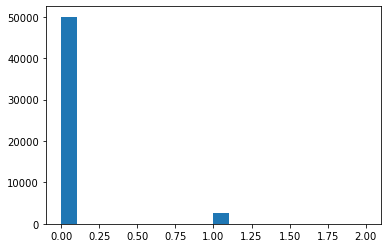

In [166]:
plt.hist(df['y'], bins=20, range=(0,2))
df['y'].value_counts()

In [ ]:
# value research : x1_term

(array([10869.,  5968.,  4258.,  4620.,  5260.,  4650.,  2441.,  1992.,
         2043.,  1159.,  1355.,  1296.,  1368.,  1331.,  1287.,  1112.,
          774.,   438.,   252.,    27.]),
 array([  0. ,  13.5,  27. ,  40.5,  54. ,  67.5,  81. ,  94.5, 108. ,
        121.5, 135. , 148.5, 162. , 175.5, 189. , 202.5, 216. , 229.5,
        243. , 256.5, 270. ]),
 <BarContainer object of 20 artists>)

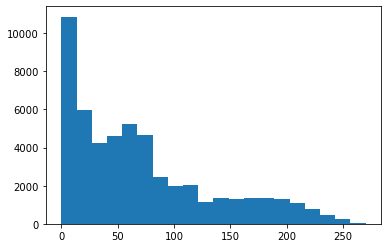

In [19]:
plt.hist(df['x1_term'], bins=20, range=(0,270))

In [158]:
bins = range(0,281,20)
term = pd.cut(df['x1_term'], bins).value_counts().sort_index()
display(term)

(0, 20]       12855
(20, 40]       6597
(40, 60]       7492
(60, 80]       7038
(80, 100]      3130
(100, 120]     3217
(120, 140]     1826
(140, 160]     2028
(160, 180]     1979
(180, 200]     1906
(200, 220]     1664
(220, 240]      792
(240, 260]      323
(260, 280]       10
Name: x1_term, dtype: int64

In [164]:
# percentage
terms = []
for v in term:
    terms.append(round(v/ df['x1_term'].value_counts().sum() *100))

print(terms)
    
list = []
i = 0
for vv in terms:
    list.append('{0} : {1}%'.format(i+20, vv))
    i=i+20
list

[24, 13, 14, 13, 6, 6, 3, 4, 4, 4, 3, 2, 1, 0]


['20 : 24%',
 '40 : 13%',
 '60 : 14%',
 '80 : 13%',
 '100 : 6%',
 '120 : 6%',
 '140 : 3%',
 '160 : 4%',
 '180 : 4%',
 '200 : 4%',
 '220 : 3%',
 '240 : 2%',
 '260 : 1%',
 '280 : 0%']

In [ ]:
# value research : x2_sex

2     26453
1     25297
99      750
Name: x2_sex, dtype: int64

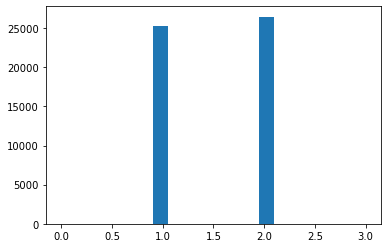

In [22]:
plt.hist(df['x2_sex'], bins=20, range=(0,3))
df['x2_sex'].value_counts()

(array([51750.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,   750.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

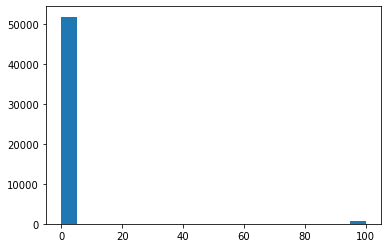

In [23]:
plt.hist(df['x2_sex'], bins=20, range=(0, 100))
# 99 : その他

In [ ]:
# 保留事項

In [148]:
# df[["y", "x0_age"]].corr()

In [149]:
# df[["y", "x1_term"]].corr()

In [150]:
# df[["y", "x2_sex"]].corr()

In [151]:
# df[["x0_age", "x1_term"]].corr()

In [153]:
# df[["x0_age", "x2_sex"]].corr()

In [152]:
# df[["x1_term", "x2_sex"]].corr()

In [145]:
# plt.scatter(x="x0_age", y="x1_term", data=df)

In [146]:
# sns.stripplot(x="x2_sex", y="x1_term", data=df)

In [147]:
# sns.boxplot(x="x2_sex", y="x1_term", data=df)

In [144]:
# # linear regression
# sns.regplot(x="x2_sex", y="x1_term", data=df)

In [38]:
# data processing

In [39]:
# compensate　missing values
# contain null column : x0_age, x10, x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71

In [40]:
# value research : x0_age

In [41]:
df_proc = df.copy()

(array([1.480e+02, 1.980e+02, 4.110e+02, 2.605e+03, 7.553e+03, 8.216e+03,
        7.215e+03, 6.590e+03, 5.937e+03, 4.759e+03, 3.212e+03, 2.128e+03,
        1.339e+03, 9.020e+02, 2.930e+02, 1.550e+02, 6.500e+01, 2.100e+01,
        2.000e+00, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

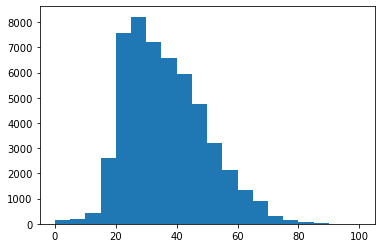

In [42]:
# histgram
plt.hist(df_proc['x0_age'], bins=20, range=(0,100))
# 'x0_age'の分布、偏りのある分布

In [43]:
# value counts
bins = range(0,81,10)
age = pd.cut(df_proc['x0_age'], bins).value_counts().sort_index()
display(age)

(0, 10]       387
(10, 20]     4192
(20, 30]    16028
(30, 40]    13523
(40, 50]    10183
(50, 60]     5006
(60, 70]     1960
(70, 80]      392
Name: x0_age, dtype: int64

In [44]:
# percentage
ages = []
for x in age:
    ages.append(round(x/ df_proc['x0_age'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}代:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20代, 2:30代, 3:40代

['0代:1%',
 '10代:8%',
 '20代:31%',
 '30代:26%',
 '40代:20%',
 '50代:10%',
 '60代:4%',
 '70代:1%']

In [45]:
df_proc['x0_age'].describe()

count    51750.000000
mean        35.915749
std         13.067311
min          0.000000
25%         26.000000
50%         34.000000
75%         44.000000
max        100.000000
Name: x0_age, dtype: float64

In [46]:
df_proc['x0_age'].median()

34.0

In [47]:
df_proc['x0_age'].mode()

0    24.0
dtype: float64

In [48]:
# mean=36, median=34, mode=24
# 補完に中央値を用いる

In [49]:
df_proc['x0_age'] = df_proc['x0_age'].fillna(df_proc['x0_age'].median())

In [ ]:
# value research : x9

In [167]:
pd.set_option('display.max_rows', 500)
df_proc['x9'].value_counts()

T    22518
K     8506
C     6926
Q     4973
H     3050
N     2642
D     1907
S     1009
R      969
Name: x9, dtype: int64

In [50]:
# value research : x10

(array([0.0000e+00, 0.0000e+00, 2.3900e+02, 5.5290e+03, 1.2195e+04,
        8.6360e+03, 6.4930e+03, 5.4770e+03, 4.8270e+03, 3.6200e+03,
        2.1290e+03, 1.1700e+03, 7.3300e+02, 4.3600e+02, 1.7500e+02,
        9.8000e+01, 4.5000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

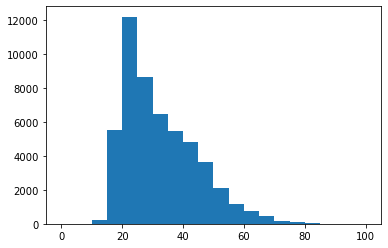

In [51]:
# histgram
plt.hist(df_proc['x10'], bins=20, range=(0,100))
# 'x10'の分布、偏りのある分布
# 年齢と相関がある？分布が似ている

In [52]:
# percentage
ages = []
for x in age:
    ages.append(round(x/ df_proc['x10'].value_counts().sum() *100))

list = []
i = 0
for xx in ages:
    list.append('{0}:{1}%'.format(i*10, xx))
    i=i+1
list
# 1:20, 2:30, 3:40
# 割合は'x0_age'と一致
# 'x0_age'同様、中央値で補完する

['0:1%', '10:8%', '20:31%', '30:26%', '40:20%', '50:10%', '60:4%', '70:1%']

In [53]:
df_proc['x10'] = df_proc['x10'].fillna(df_proc['x10'].median())

In [54]:
# value research : x58, x59, x60, x61, x62, x63, x64, x65, x66, x67, x68, x69, x70, x71 

In [55]:
df_hist = df_proc.copy()

In [107]:
# null count
print('null : {0}, values : {1}'.format(df_hist['x58'].isnull().sum(), (len(df_hist['x58']) - df_hist['x58'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x59'].isnull().sum(), (len(df_hist['x59']) - df_hist['x59'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x60'].isnull().sum(), (len(df_hist['x60']) - df_hist['x60'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x61'].isnull().sum(), (len(df_hist['x61']) - df_hist['x61'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x62'].isnull().sum(), (len(df_hist['x62']) - df_hist['x62'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x63'].isnull().sum(), (len(df_hist['x63']) - df_hist['x63'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x64'].isnull().sum(), (len(df_hist['x64']) - df_hist['x64'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x65'].isnull().sum(), (len(df_hist['x65']) - df_hist['x65'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x66'].isnull().sum(), (len(df_hist['x66']) - df_hist['x66'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x67'].isnull().sum(), (len(df_hist['x67']) - df_hist['x67'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x68'].isnull().sum(), (len(df_hist['x68']) - df_hist['x68'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x69'].isnull().sum(), (len(df_hist['x69']) - df_hist['x69'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x70'].isnull().sum(), (len(df_hist['x70']) - df_hist['x70'].isnull().sum())))
print('null : {0}, values : {1}'.format(df_hist['x71'].isnull().sum(), (len(df_hist['x71']) - df_hist['x71'].isnull().sum()))) # 欠損値が多い（99.9%）。欠損の意味が不明。重要度が低ければ除外する

# x58, x59, x61, x62, x64, x65, x66, x67 / null:51732
# x63 / null:52119
# x67, x68, x69, X70 / null:52274
# x71  / null:52460

# 欠損値の意味が不明？　中央値・最頻値、それぞれどちらが重要となる？
# 欠損値に意味がある？
# 欠損が多すぎる？

null : 51732, values : 768
null : 51732, values : 768
null : 51732, values : 768
null : 51732, values : 768
null : 52119, values : 381
null : 51732, values : 768
null : 51732, values : 768
null : 51732, values : 768
null : 51732, values : 768
null : 52274, values : 226
null : 52274, values : 226
null : 52274, values : 226
null : 52274, values : 226
null : 52460, values : 40


count    768.000000
mean       2.639323
std        3.165799
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       54.000000
Name: x58, dtype: float64


(array([523., 160.,  52.,  14.,  15.,   2.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

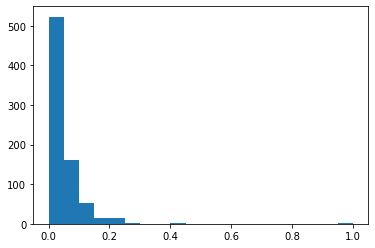

In [56]:
# histgram
print(df_hist['x58'].describe())
print("="*50)
# plt.hist(df_hist['x58'], bins=20, range=(0,60))
# print("="*50)
df_hist['x58'] = df_hist['x58']/df_hist['x58'].max()
plt.hist(df_hist['x58'], bins=20, range=(0,1))

count      768.000000
mean     14595.561198
std      16842.294721
min        500.000000
25%       3000.000000
50%       7600.000000
75%      20000.000000
max      90000.000000
Name: x59, dtype: float64


(array([232., 178., 123.,  20.,  40.,  19.,  50.,  10.,  16.,   8.,  17.,
         21.,   8.,  16.,   0.,   3.,   1.,   4.,   0.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

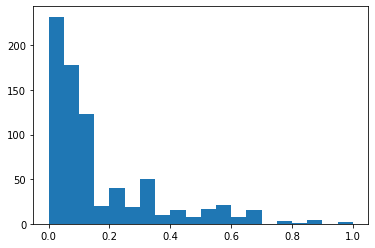

In [57]:
print(df_hist['x59'].describe())
print("="*50)
# plt.hist(df_hist['x59'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x59'] = df_hist['x59']/df_hist['x59'].max()
plt.hist(df_hist['x59'], bins=20, range=(0,1))

count      768.000000
mean      7972.395833
std       9261.323792
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x60, dtype: float64


(array([273., 201., 208.,   5.,   8.,  30.,   3.,  19.,   3.,   0.,   4.,
          0.,   8.,   0.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

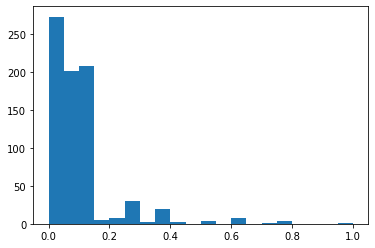

In [58]:
# histgram
print(df_hist['x60'].describe())
print("="*50)
# plt.hist(df_hist['x60'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x60'] = df_hist['x60']/df_hist['x60'].max()
plt.hist(df_hist['x60'], bins=20, range=(0,1))

count      768.000000
mean      5243.998698
std       7576.654197
min        191.000000
25%       1000.000000
50%       3000.000000
75%       5000.000000
max      78000.000000
Name: x61, dtype: float64


(array([414., 187., 134.,   1.,   1.,   9.,   1.,  11.,   0.,   0.,   1.,
          0.,   4.,   0.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

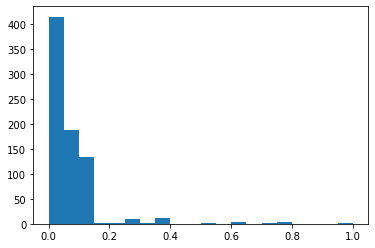

In [59]:
print(df_hist['x61'].describe())
print("="*50)
# plt.hist(df_hist['x61'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x61'] = df_hist['x61']/df_hist['x61'].max()
plt.hist(df_hist['x61'], bins=20, range=(0,1))

count      381.000000
mean      2864.511639
std       4429.073467
min          0.000000
25%        346.410162
50%       1414.213562
75%       3427.827300
max      31754.264805
Name: x62, dtype: float64


(array([205.,  70.,  49.,  11.,  12.,  13.,   6.,   4.,   0.,   1.,   0.,
          1.,   1.,   3.,   0.,   2.,   0.,   1.,   0.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

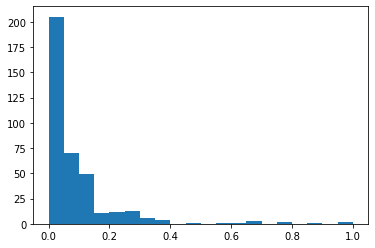

In [60]:
print(df_hist['x62'].describe())
print("="*50)
# plt.hist(df_hist['x62'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x62'] = df_hist['x62']/df_hist['x62'].max()
plt.hist(df_hist['x62'], bins=20, range=(0,1))

count    7.680000e+02
mean     8.205164e+05
std      8.230016e+05
min      5.400000e+01
25%      6.440150e+04
50%      5.051900e+05
75%      1.532342e+06
max      2.676106e+06
Name: x63, dtype: float64


(array([251.,  65.,  41.,  34.,  27.,  29.,  21.,  25.,  24.,  19.,  31.,
         27.,  31.,  32.,  20.,  21.,  18.,  18.,  12.,  22.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

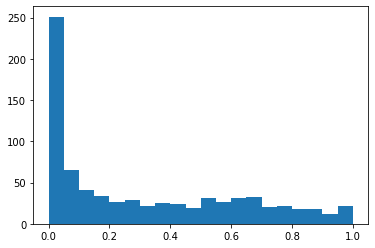

In [88]:
print(df_hist['x63'].describe())
print("="*50)
# plt.hist(df_hist['x63'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x63'] = df_hist['x63']/df_hist['x63'].max()
plt.hist(df_hist['x63'], bins=20, range=(0,1))

count    7.680000e+02
mean     1.247370e+06
std      8.961457e+05
min     -8.410600e+04
25%      4.644518e+05
50%      1.094285e+06
75%      2.168428e+06
max      3.220710e+06
Name: x64, dtype: float64


(array([ 56.,  50.,  52.,  50.,  53.,  39.,  44.,  41.,  34.,  36.,  18.,
         25.,  23.,  26.,  30., 113.,  34.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

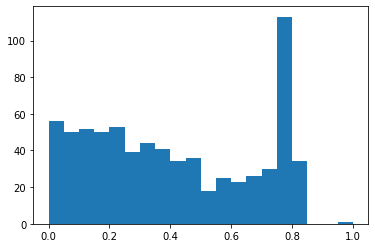

In [89]:
print(df_hist['x64'].describe())
print("="*50)
# plt.hist(df_hist['x64'], bins=20, range=(0,330000))
# print("="*50)
df_hist['x64'] = df_hist['x64']/df_hist['x64'].max()
plt.hist(df_hist['x64'], bins=20, range=(0,1))

count      768.000000
mean      5854.557292
std       7996.818472
min        500.000000
25%       1000.000000
50%       4000.000000
75%       7775.000000
max      78000.000000
Name: x65, dtype: float64


(array([378., 198., 146.,   2.,   5.,  14.,   1.,  11.,   1.,   0.,   2.,
          0.,   5.,   0.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

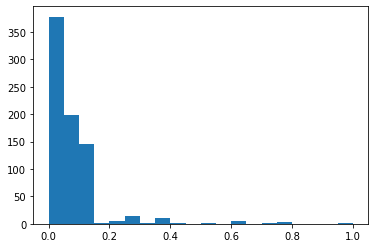

In [63]:
print(df_hist['x65'].describe())
print("="*50)
# plt.hist(df_hist['x65'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x65'] = df_hist['x65']/df_hist['x65'].max()
plt.hist(df_hist['x65'], bins=20, range=(0,1))

count      768.000000
mean      6876.811198
std       8413.262309
min        191.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      78000.000000
Name: x66, dtype: float64


(array([319., 201., 188.,   4.,   3.,  20.,   3.,  15.,   1.,   0.,   3.,
          0.,   6.,   0.,   1.,   3.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

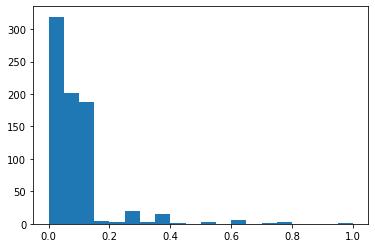

In [64]:
# histgram
print(df_hist['x66'].describe())
print("="*50)
# plt.hist(df_hist['x66'], bins=20, range=(0,80000))
# print("="*50)
df_hist['x66'] = df_hist['x66']/df_hist['x66'].max()
plt.hist(df_hist['x66'], bins=20, range=(0,1))

count    226.000000
mean       1.300885
std        0.852551
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: x67, dtype: float64


(array([  0.,   0., 186.,   0.,  24.,   0.,  12.,   0.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

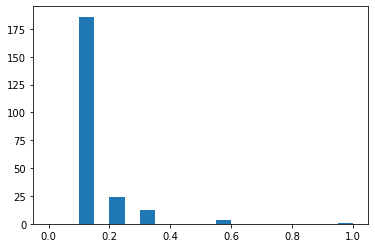

In [65]:
# histgram
print(df_hist['x67'].describe())
print("="*50)
# plt.hist(df_hist['x67'], bins=20, range=(0,9))
# print("="*50)
df_hist['x67'] = df_hist['x67']/df_hist['x67'].max()
plt.hist(df_hist['x67'], bins=20, range=(0,1))

count      226.000000
mean     12192.035398
std      14638.063877
min        500.000000
25%       3000.000000
50%       6600.000000
75%      10000.000000
max      90000.000000
Name: x68, dtype: float64


(array([76., 48., 50.,  2., 14.,  3., 13.,  1.,  3.,  1.,  1.,  8.,  2.,
         3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

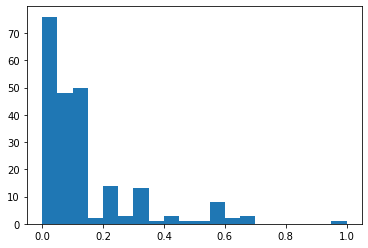

In [66]:
# histgram
print(df_hist['x68'].describe())
print("="*50)
# plt.hist(df_hist['x68'], bins=20, range=(0,90000))
# print("="*50)
df_hist['x68'] = df_hist['x68']/df_hist['x68'].max()
plt.hist(df_hist['x68'], bins=20, range=(0,1))

count      226.000000
mean     10245.575221
std      11959.479843
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x69, dtype: float64


(array([34., 85.,  9., 58.,  0.,  1., 11.,  1.,  3.,  2.,  8.,  2.,  0.,
         3.,  0.,  0.,  6.,  0.,  0.,  3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

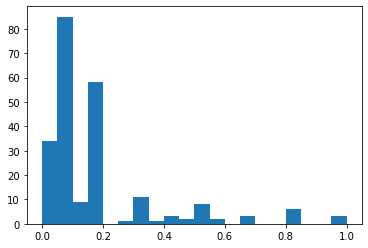

In [67]:
# histgram
print(df_hist['x69'].describe())
print("="*50)
# plt.hist(df_hist['x69'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x69'] = df_hist['x69']/df_hist['x69'].max()
plt.hist(df_hist['x69'], bins=20, range=(0,1))

count      226.000000
mean      9327.876106
std      11369.134508
min        500.000000
25%       3000.000000
50%       5000.000000
75%      10000.000000
max      59500.000000
Name: x70, dtype: float64


(array([44., 80., 10., 58.,  0.,  1.,  9.,  1.,  3.,  3.,  6.,  1.,  0.,
         2.,  0.,  0.,  5.,  0.,  0.,  3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

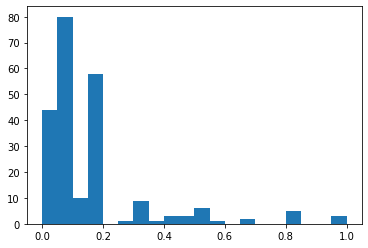

In [68]:
# histgram
print(df_hist['x70'].describe())
print("="*50)
# plt.hist(df_hist['x70'], bins=20, range=(0,60000))
# print("="*50)
df_hist['x70'] = df_hist['x70']/df_hist['x70'].max()
plt.hist(df_hist['x70'], bins=20, range=(0,1))

count       40.000000
mean      3339.688069
std       6667.264737
min          0.000000
25%          0.000000
50%        895.548321
75%       2453.738644
max      31112.698372
Name: x71, dtype: float64


(array([27.,  5.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

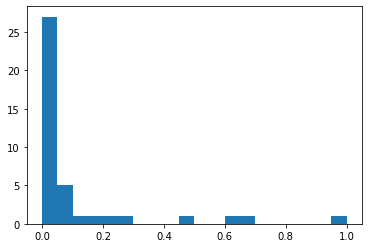

In [69]:
# histgram
print(df_hist['x71'].describe())
print("="*50)
# plt.hist(df_hist['x71'], bins=20, range=(0,32000))
# print("="*50)
df_hist['x71'] = df_hist['x71']/df_hist['x71'].max()
plt.hist(df_hist['x71'], bins=20, range=(0,1))

In [70]:
# similar distribution
# x58, x62, X71
# x59, x68, x67
# x60, x61, x65, x66
# x63, x64 float
# x69, x70

In [ ]:
# 欠損値の意味は不明
# 最頻値の割合が多い、最頻値で補完　？　NULLの意味は？

In [143]:
print('x58') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x58'].mode()) # same
print(df_proc['x58'].median())
print("="*50)

print('x59')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x59'].mode())
print('mode : {0}'.format(round(df_proc['x59'].value_counts()[df_proc['x59'].mode()]/df_proc['x59'].count()*100,1)))
print(df_proc['x59'].median())
print("="*50)

print('x60')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x60'].mode())
print('mode : {0}'.format(round(df_proc['x60'].value_counts()[df_proc['x60'].mode()]/df_proc['x60'].count()*100,1)))
print(df_proc['x60'].median())
print("="*50)

print('x61')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x61'].mode())
print('mode : {0}'.format(round(df_proc['x61'].value_counts()[df_proc['x61'].mode()]/df_proc['x61'].count()*100,1)))
print(df_proc['x61'].median())
print("="*50)

print('x62')
#　0が最頻値(20.7%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x62'].mode())
print('mode : {0}'.format(round(df_proc['x62'].value_counts()[df_proc['x62'].mode()]/df_proc['x62'].count()*100,1)))
print(df_proc['x62'].median())
print("="*50)

print('x63')
# 外れ値あり。最頻値が他より圧倒的に多い。代表値： 最頻値とする
print(df_proc['x63'].mode())
print('mode : {0}'.format(round(df_proc['x63'].value_counts()[df_proc['x63'].mode()]/df_proc['x63'].count()*100,1)))
print(df_proc['x63'].median())
print("="*50)

print('x64')
# contain minus values
# マイナスにも触れている。損益金？マイナス値にも意味があるため、正負を考慮したい。外れ値があり、正規分布でないため、中央値を使用することとする。
print(df_proc['x64'].mode()) 
print('mode : {0}'.format(round(df_proc['x64'].value_counts()[df_proc['x64'].mode()]/df_proc['x64'].count()*100,1)))
print(df_proc['x64'].median())
print("="*50)

print('x65')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x65'].mode()) # near
print('mode : {0}'.format(round(df_proc['x65'].value_counts()[df_proc['x65'].mode()]/df_proc['x65'].count()*100,1)))
print(df_proc['x65'].median())
print("="*50)

print('x66')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x66'].mode())
print('mode : {0}'.format(round(df_proc['x66'].value_counts()[df_proc['x66'].mode()]/df_proc['x66'].count()*100,1)))
print(df_proc['x66'].median())
print("="*50)

print('x67') # 最頻値、中央値、同じため、代表値：1 とする
print(df_proc['x67'].mode()) # same
print(df_proc['x67'].median())
print("="*50)

print('x68')
# 外れ値あり。最頻値と、中央値・準中央値で同程度の割合。代表値：中央値とする。
print(df_proc['x68'].mode())
print('mode : {0}'.format(round(df_proc['x68'].value_counts()[df_proc['x68'].mode()]/df_proc['x68'].count()*100,1)))
print(df_proc['x68'].median())
print("="*50)

print('x69')
# x70と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x69'].mode())
print('mode : {0}'.format(round(df_proc['x69'].value_counts()[df_proc['x69'].mode()]/df_proc['x69'].count()*100,1)))
print(df_proc['x69'].median())
print("="*50)

print('x70')
# x69と同じ分布。相関あり。
# 山が２つある。その為、平均値・中央値の使用は避けたい。一番大きな山（最頻値：25.7%)　代表値： 最頻値とする
print(df_proc['x70'].mode())
print('mode : {0}'.format(round(df_proc['x70'].value_counts()[df_proc['x70'].mode()]/df_proc['x70'].count()*100,1)))
print(df_proc['x70'].median())
print("="*50)

print('x71')
#　0が最頻値(35%)。0に意味があると思われる。未入力（欠損）にも意味があると思われる。欠損値とわかるよう、最低値が0、区別するため代表値： -1とする
print(df_proc['x71'].mode())
print('mode : {0}'.format(round(df_proc['x71'].value_counts()[df_proc['x71'].mode()]/df_proc['x71'].count()*100,1)))
print(df_proc['x71'].median())

x58
0    1.0
dtype: float64
1.0
x59
0    5000.0
dtype: float64
mode : 5000.0    14.2
Name: x59, dtype: float64
7600.0
x60
0    10000.0
dtype: float64
mode : 10000.0    24.9
Name: x60, dtype: float64
5000.0
x61
0    1000.0
dtype: float64
mode : 1000.0    19.8
Name: x61, dtype: float64
3000.0
x62
0    0.0
dtype: float64
mode : 0.0    20.7
Name: x62, dtype: float64
1414.2135623730999
x63
0    28680.0
dtype: float64
mode : 28680.0    0.3
Name: x63, dtype: float64
505190.0
x64
0       -84106.0
1       -83614.0
2       -82201.0
3       -81403.0
4       -76568.0
         ...    
763    2591813.0
764    2591815.0
765    2591822.0
766    2591946.0
767    3220710.0
Length: 768, dtype: float64
mode : -84106.0      0.1
-83614.0      0.1
-82201.0      0.1
-81403.0      0.1
-76568.0      0.1
             ... 
 2591813.0    0.1
 2591815.0    0.1
 2591822.0    0.1
 2591946.0    0.1
 3220710.0    0.1
Name: x64, Length: 768, dtype: float64
1094285.0
x65
0    5000.0
dtype: float64
mode : 5000.0    18.9
N

In [ ]:
# complement missing values
df_proc['x58'] = df_proc['x58'].fillna(1)
df_proc['x59'] = df_proc['x59'].fillna(df_proc['x59'].median())
df_proc['x60'] = df_proc['x60'].fillna(df_proc['x60'].median())
df_proc['x61'] = df_proc['x61'].fillna(df_proc['x61'].median())
df_proc['x62'] = df_proc['x62'].fillna(-1)
df_proc['x63'] = df_proc['x63'].fillna(df_proc['x63'].mode())
df_proc['x64'] = df_proc['x64'].fillna(df_proc['x64'].median())
df_proc['x65'] = df_proc['x65'].fillna(df_proc['x65'].median())
df_proc['x66'] = df_proc['x66'].fillna(df_proc['x66'].median())
df_proc['x67'] = df_proc['x67'].fillna(1)
df_proc['x68'] = df_proc['x68'].fillna(df_proc['x68'].median())
df_proc['x69'] = df_proc['x69'].fillna(df_proc['x69'].mode())
df_proc['x70'] = df_proc['x70'].fillna(df_proc['x70'].mode())
df_proc['x71'] = df_proc['x71'].fillna(-1) # 欠損が99.9%のため、重要度が低ければ除外して再学習させる。

In [168]:
# 相関性評価

In [169]:
# 相関行列
pd.set_option('display.max_columns', 100) # float
corr_matrix = df.corr(method='pearson') # pearson, kendall, spearman
corr_matrix

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72
y,1.000000,-0.028118,-0.139612,0.052961,0.060146,-0.071414,0.141337,-0.137543,0.015804,0.004739,0.005159,0.013533,0.041599,0.027372,NaN,0.015867,0.008022,0.000009,NaN,NaN,0.028109,NaN,NaN,NaN,0.007752,0.028333,0.009750,NaN,NaN,NaN,NaN,NaN,-0.009009,NaN,NaN,NaN,NaN,NaN,NaN,-0.005195,NaN,0.098968,0.167490,0.178006,0.167800,0.174349,NaN,NaN,NaN,NaN,NaN,NaN,-0.007823,-0.004361,-0.001429,-0.022399,-0.105630,-0.029269,-0.039634,-0.039843,-0.012985,0.018514,-0.011890,0.045575,0.098438,0.023640,-0.023992,0.097173,0.038659,-0.003576,-0.036780,0.000243,NaN
x0_age,-0.028118,1.000000,0.218331,-0.018795,0.039411,-0.060988,-0.029290,0.060868,0.001103,0.014810,0.654735,0.004990,0.026213,0.017588,NaN,0.019786,-0.063562,0.000840,NaN,NaN,-0.053337,NaN,NaN,NaN,-0.019757,-0.022808,-0.022985,NaN,NaN,NaN,NaN,NaN,0.061218,NaN,NaN,NaN,NaN,NaN,NaN,-0.073126,NaN,0.007986,0.081995,0.061792,0.085537,0.062126,NaN,NaN,NaN,NaN,NaN,NaN,-0.244978,-0.054380,0.008272,-0.131616,0.043387,0.000575,0.024444,0.072816,0.060413,0.095118,-0.022493,-0.071166,0.006592,0.087308,0.101301,-0.114620,-0.004519,0.054471,0.110482,-0.209918,NaN
x1_term,-0.139612,0.218331,1.000000,-0.047369,0.227346,-0.496571,0.032557,0.012942,-0.180707,-0.061228,-0.214250,-0.260510,-0.265010,-0.254840,NaN,-0.011559,0.062159,-0.184178,NaN,NaN,-0.149281,NaN,NaN,NaN,-0.087313,-0.069894,-0.038414,NaN,NaN,NaN,NaN,NaN,-0.075035,NaN,NaN,NaN,NaN,NaN,NaN,-0.057579,NaN,-0.092262,-0.233340,-0.255237,-0.232073,-0.228487,NaN,NaN,NaN,NaN,NaN,NaN,-0.044376,0.085404,-0.011894,-0.017797,0.687055,-0.008843,-0.007018,0.076054,0.084022,0.090061,0.042803,0.009576,-0.049619,0.078555,0.081827,0.013908,0.040230,0.010462,0.010787,0.161214,NaN
x2_sex,0.052961,-0.018795,-0.047369,1.000000,0.158724,-0.024902,-0.036503,0.038952,0.014570,0.000168,0.003694,-0.015469,0.047387,0.025570,NaN,-0.000537,0.024088,0.083974,NaN,NaN,0.070719,NaN,NaN,NaN,-0.023256,0.014242,0.009198,NaN,NaN,NaN,NaN,NaN,0.007218,NaN,NaN,NaN,NaN,NaN,NaN,0.026618,NaN,0.177495,0.133174,0.105199,0.136317,0.104499,NaN,NaN,NaN,NaN,NaN,NaN,-0.011733,-0.003046,-0.016745,-0.029138,-0.052625,0.227959,-0.064525,-0.035112,-0.009387,-0.014012,0.041259,0.019974,0.015617,-0.019461,0.003745,-0.029737,0.051804,0.090581,0.108239,-0.065903,NaN
x3,0.060146,0.039411,0.227346,0.158724,1.000000,-0.218458,0.026209,-0.011505,-0.003416,-0.007481,-0.104704,0.003943,-0.021299,-0.028183,NaN,0.007236,0.015594,-0.037265,NaN,NaN,-0.012520,NaN,NaN,NaN,-0.024495,-0.001896,-0.003223,NaN,NaN,NaN,NaN,NaN,-0.000283,NaN,NaN,NaN,NaN,NaN,NaN,-0.003229,NaN,0.102613,0.039725,0.032492,0.042675,0.037878,NaN,NaN,NaN,NaN,NaN,NaN,-0.044106,0.031946,-0.007261,-0.016432,0.120899,0.109394,-0.003601,-0.007602,0.016517,0.010829,0.083893,0.039549,0.000622,-0.006897,0.022163,-0.101695,0.022304,0.069118,0.050980,0.349006,NaN
x4,-0.071414,-0.060988,-0.496571,-0.024902,-0.218458,1.000000,-0.110198,0.082919,0.110314,0.022799,0.137801,0.263883,0.129837,0.144549,NaN,-0.022637,-0.033840,0.130987,NaN,NaN,0.096356,NaN,NaN,NaN,0.035927,0.020602,0.014573,NaN,NaN,NaN,NaN,NaN,0.035098,NaN,NaN,NaN,NaN,NaN,NaN,0.016146,NaN,-0.050270,0.026134,0.053122,0.010847,0.036707,NaN,NaN,NaN,NaN,NaN,NaN,0.063189,-0.069219,0.010483,-0.062652,-0.397859,-0.017221,0.006854,0.057160,0.040418,-0.002675,0.044704,-0.071680,0.015712,0.029205,0.001295,-0.033480,0.050479,0.071379,0.063277,0.067512,NaN
x5,0.141337,-0.029290,0.032557,-0.036503,0.026209,-0.110198,1.000000,-0.790922,0.015324,0.005010,-0.068206,0.029079,-0.087404,-0.082835,NaN,0.008522,0.105066,-0.113829,NaN,NaN,-0.073629,NaN,NaN,NaN,-0.000630,0.022378,-0.021567,NaN,NaN,NaN,NaN,NaN,-0.106431,NaN,NaN,NaN,NaN,NaN,NaN,-0.010242,NaN,-0.031734,-0.093389,-0.094335,-0.093436,-0.089737,NaN,NaN,NaN,NaN,N

In [208]:
# 相関行列
pd.set_option('display.max_columns', 100) # float
corr_matrix = df.corr(method='pearson') # pearson, kendall, spearman
corr_matrix = corr_matrix * -1
corr_matrix[67:][(corr_matrix.abs() > 0.5)]

,y,x0_age,x1_term,x2_sex,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72
x67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
x68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.677362,-0.779788,-0.705180,NaN,NaN,NaN,-0.700312,-0.820502,NaN,-1.000000,-0.848998,-0.759048,NaN,NaN
x69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.600126,-0.928313,-0.828421,-0.746736,NaN,NaN,-0.822619,-0.975520,NaN,-0.848998,-1.000000,-0.922185,-0.882825,NaN
x70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.551002,-0.857561,-0.887155,NaN,NaN,NaN,-0.865740,-0.945498,NaN,-0.759048,-0.922185,-1.000000,NaN,NaN
x71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.877337,NaN,-0.983248,NaN,NaN,NaN,-0.709226,NaN,NaN,-0.882825,NaN,-1.000000,NaN
x72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# strong correlation
# x0_age ⇆ x10, x56
# x5 ⇆ x6
# x12 ⇆ x13
# x16 ⇆ x32	
# x42 ⇆ x43, x44, x45
# x43 ⇆ x42, x44, x45
# x44 ⇆ x42, x43, x45
# x45 ⇆ x42, x43, x44
# x58 ⇆ x59
# x59 ⇆ x58, x60, x66, x68, x69, x70
# x60 ⇆ x59, x61, x62, x65, x66, 
# x61 ⇆ x61, x65, x68, x69, x70
# x62 ⇆ x60, x66, x69, x71, x68, x69, x70, x71
# x63 ⇆ x64
# x64 ⇆ x63
# x65 ⇆ x60, x61, x65, x66, x68, x69, x70
# x66 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70
# x68 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x69 ⇆ x59, x60, x61, x62, x65, x66, x68, x69, x70, x71
# x70 ⇆ x59, x60, x61, x65, x66, x68, x69, x70
# x71 ⇆ , x60, x62, x66, x69, x71

In [ ]:
# Check Point!!
# 使える・使えないの識別
# 相関のある変数は組み合わせて新たな変数をつくれないか

In [170]:
df_corr = pd.get_dummies(df.drop(columns=['x9']), drop_first=True)
corr_y = pd.DataFrame({'features': df_corr.columns, 'corr_y': corr_matrix['y']}, index=None)
corr_y = corr_y.reset_index(drop=True).sort_values('corr_y', ascending=False)
corr_y.style.background_gradient()

,features,corr_y
0,y,1.000000
43,x43,0.178006
45,x45,0.174349
44,x44,0.167800
42,x42,0.167490
6,x5,0.141337
41,x41,0.098968
64,x64,0.098438
67,x67,0.097173
4,x3,0.060146


In [171]:
#相関係数の絶対値をとって、閾値と比較する
select_cols = corr_y[corr_y["corr_y"].abs()>0.1] # filtering, 0.1 low?
select_cols.sort_values('corr_y', ascending=False)

,features,corr_y
0,y,1.000000
43,x43,0.178006
45,x45,0.174349
44,x44,0.167800
42,x42,0.167490
6,x5,0.141337
56,x56,-0.105630
7,x6,-0.137543
2,x1_term,-0.139612


In [130]:
# ランダム・フォレストによる相互作用評価
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X = df2.drop(columns='y')
y = df2['y']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
# train_y = scaler.fit_transform(train_y)

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(train_X, train_y)

pred_y = classifier.predict(test_X)
cm = confusion_matrix(test_y, pred_y)
accuracy_score(test_y, pred_y)

# Importtance
importance = classifier.feature_importances_
importances = pd.DataFrame(importance, index = X.columns, columns=['importance'])
pd.set_option('display.max_rows', 80)
importances.sort_values(by='importance', ascending=False)

,importance
x1_term,0.144917
x10,0.099464
x0_age,0.097251
x5,0.059687
x3,0.054414
x6,0.053120
x56,0.045609
x57,0.040315
x4,0.037598
x2_sex,0.026129


In [44]:
# sns.set_context("talk")
# fig = plt.subplots(figsize=(100, 100))
# sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='Blues', square=True)

In [45]:
# all distribution
# sns.pairplot(data_corr)

In [46]:
# 特徴量選択は、目的変数との相関係数が0.X以上とする？

In [47]:
# missing value(null) count and percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(20)

,Total,Percent
x71,52460,0.999238
x70,52274,0.995695
x69,52274,0.995695
x68,52274,0.995695
x67,52274,0.995695
x62,52119,0.992743
x59,51732,0.985371
x60,51732,0.985371
x61,51732,0.985371
x58,51732,0.985371


In [48]:
# data[''] = data[''].replace({'':1 ,'':0})

In [49]:
# set dummies
df = pd.get_dummies(df.drop(columns=['x71']), drop_first=True) # dummy_na=True
# df.columns

In [91]:
# Data divide
df_X = df2.drop(columns='y') # all variable
# df_X = df2.iloc[:, 12:13] #  only
# print(df_X.head(3))

df_y = df2['y']
# print(df_y.head(3))

   x12
0   99
1    4
2    2


In [92]:
# 内部のハイパーパラメータの動きはどうなっている？
# バリエーションデータ作成目的を説明できる？
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [93]:
# Create dataset
lgb_train = lgb.Dataset(X_train_val, y_train_val)
lgb_val = lgb.Dataset(X_val, y_val)

In [94]:
# 説明できる？
param = {'metric': 'auc', 'objective': 'binary'}

In [95]:
# modeling
model = lgb.train(param, lgb_train, valid_sets=lgb_val)

[LightGBM] [Info] Number of positive: 1601, number of negative: 31999
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 33600, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047649 -> initscore=-2.995076
[LightGBM] [Info] Start training from score -2.995076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.584385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.584385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.584385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's auc: 0.584385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.

In [96]:
prebs = model.predict(X_test)
prebs

array([0.04966091, 0.04966091, 0.06222184, ..., 0.02068672, 0.04966091,
       0.02068672])

In [97]:
# extraction of true,false positive ratio
fpr, tpr, thresholds = metrics.roc_curve(y_test, prebs)
auc = metrics.auc(fpr, tpr)
auc

# 変数単体でのAUC
# x1_term : 0.7258950794142892
# x6 : 0.6615857035949022
# x3 0.6560254281932084
# x5 : 0.6558202078662744
# x0_age : 0.5986913518161799
# x4 : 0.5793724481948183
# x12 0.5720290472437117
# x2_sex : 0.5711118319281385
# x10 : 0.5555445750504683
# x7 : 0.5025797988282915
# x8 : 0.49984190065104656

# 	Importance
# x1_term	459
# x0_age	376
# x10	358
# x5	176
# x56	147
# x57	138
# x55	117
# x3	108

0.5720290472437117

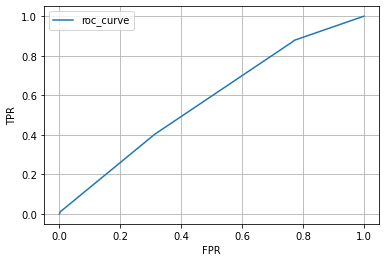

In [98]:
plt.plot(fpr, tpr, label='roc_curve')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [99]:
# extraction of importance
pd.set_option('display.max_rows', 80)
importance = pd.DataFrame(model.feature_importance(), index = df_X.columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=False)

,Importance
x12,400


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

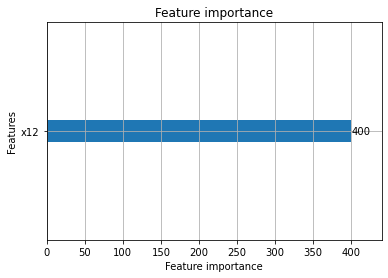

In [100]:
lgb.plot_importance(model)

In [271]:
preds = []
for x in preds:
    y_pred.append(np.argmax(x))

In [279]:
# accuracy_score(y_test, y_pred)

In [278]:
# recall_score(y_test, y_pred)

In [277]:
# precision_score(y_test, y_pred)

In [276]:
# f1_score(y_test, y_pred)